### About Dataset

https://www.kaggle.com/uciml/pima-indians-diabetes-database/downloads/pima-indians-diabetes-database.zip/1

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

**Description**

Columns
* PregnanciesNumber of times pregnant
* GlucosePlasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressureDiastolic blood pressure (mm Hg)
* SkinThicknessTriceps skin fold thickness (mm)
* Insulin2-Hour serum insulin (mu U/ml)
* BMIBody mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunctionDiabetes pedigree function
* AgeAge (years)
* OutcomeClass variable (0 or 1) 268 of 768 are 1, the others are 0

### Load dataset

In [2]:
#importing modules
import numpy as np 
import pandas as pd 

#loading datasets
data = pd.read_csv("diabetes.csv")
#the fist 5 rows
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Get Dataset Summary

In [3]:
#the dataset summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Check outcome counts

In [4]:
#counting the Outcome variable
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
### Get Column names with 0

In [3]:
data.apply(lambda x: x if x.min()==0 else None).columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Following columns have an invalid zero minimum value:

* Plasma glucose concentration
* Diastolic blood pressure
* Triceps skinfold thickness
* 2-Hour serum insulin
* Body mass index
* Now you need to identify and mark values 

So will need to treat these values....
* Convert these to NaN
* Fill with mean

### Check How many zeros are present in each of above feature

In [4]:
data.apply(lambda x: x if x.min()==0 else None).columns[1:-1]

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [66]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
feature =data.apply(lambda x: x if x.min()==0 else None).columns[1:-2]

print((data.iloc[:,[1,2,3,4,5,6]] == 0).sum())
print('\n')
print((data.loc[:,feature] == 0).sum())
#print(feature)

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
dtype: int64


Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
dtype: int64


### Replace zeroes with NaN

In [10]:
data.columns[1:6]

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'], dtype='object')

In [11]:
# Mark zero values as missing or NaN
data.iloc[:,1:6] = data.iloc[:,1:6].replace(0, np.NaN)
# Count the number of NaN values in each column
print(data.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


### Fill missing values with NaN

In [12]:
# Fill missing values with mean column values
data.fillna(data.mean(), inplace=True)
# Count the number of NaN values in each column
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [71]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


### Split values between input and output

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix
import time

In [14]:
y = data.iloc[:,-1]
X = data.iloc[:,:-1]
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.20, random_state=123)

In [96]:
#Without Hyper Parameters Tuning
#Logistic Regression
#DesicionTree
#,Randomforest
#kNearestNeighbors
#With Hyper Parameters Tuning
#Logistic Regression
#DesicionTree
#Randomforest
#kNearestNeighbors

### Without Parameters

##### Logistic 

In [97]:
import time
from sklearn.linear_model import LogisticRegression
start = time.time()
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
prediction = LR_model.predict(X_test)
scores = cross_val_score(LR_model, X, y, cv=5)
end = time.time()
#evaluation(Accuracy)
print("Accuracy:",accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",confusion_matrix(prediction,y_test))

Accuracy: 0.7922077922077922
Confusion Metrix:
 [[87 23]
 [ 9 35]]


##### Decision Tree

In [100]:
#Without Hyper Parameters Tuning
#1-1,DesicionTree
#importing module
from sklearn.tree import DecisionTreeClassifier
#making the instance
import time
start = time.time()
dt_model = model= DecisionTreeClassifier(random_state=123)
dt_model.fit(X_train, y_train)
prediction = dt_model.predict(X_test)
scores = cross_val_score(dt_model, X, y, cv=5)
end = time.time()
#evaluation(Accuracy)
print("Accuracy:",accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",confusion_matrix(prediction,y_test))

Accuracy: 0.7467532467532467
Confusion Metrix:
 [[71 14]
 [25 44]]


##### Random Forest

In [101]:
#Without Hyper Parameters Tuning
#1-2,Randomforest
#importing module
from sklearn.ensemble import RandomForestClassifier
#making the instance
model=RandomForestClassifier(n_jobs=-1)
#learning
model.fit(X_train,y_train)
#Prediction
prediction=model.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy: 0.7337662337662337
Confusion Metrix:
 [[77 22]
 [19 36]]


##### KNN Neighbour

In [24]:
from sklearn.neighbors import KNeighborsClassifier

#Without Hyper Parameters Tuning
#importing module
start = time.time()
knn_model_1 = KNeighborsClassifier(n_neighbors=25)
knn_model_1.fit(X_train, y_train)
prediction = knn_model_1.predict(X_test)
scores = cross_val_score(knn_model_1, X, y, cv=5)
end = time.time()
print("Accuracy:",accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",confusion_matrix(prediction,y_test))

Accuracy: 0.7922077922077922
Confusion Metrix:
 [[88 24]
 [ 8 34]]


#### Finding Neighbour Count

In [22]:
error_rate=[]
for i in range(1,70):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

Text(0,0.5,'Error Rate')

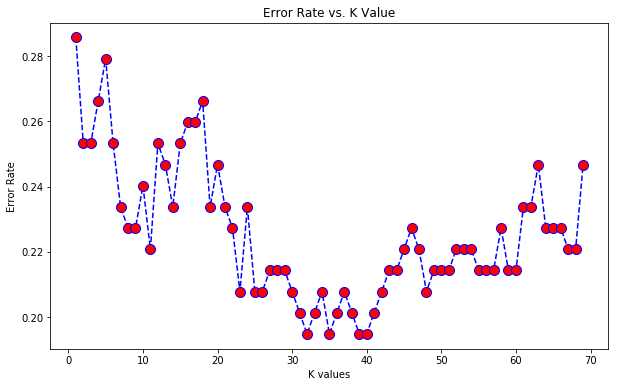

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,70),error_rate,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K values')
plt.ylabel('Error Rate')

### With Hyper parameter Tuning

##### Logistics Regression

In [107]:
dual=[True,False]
max_iter=[100,110]
C = [1.0,1.5,2.0]

2*2*3=12

param_grid = dict(dual=dual,max_iter=max_iter,C=C)

In [104]:
param_grid

{'dual': [True, False], 'max_iter': [100, 110], 'C': [1.0, 1.5, 2.0]}

In [105]:


from sklearn.model_selection import GridSearchCV
lr = LogisticRegression()

grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(X_train,y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')


Best: 0.752443 using {'C': 1.5, 'dual': False, 'max_iter': 100}
Execution time: 72.27024698257446 ms


##### Decision Tree

In [54]:
#With Hyper Parameters Tuning
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
#making the instance
model= DecisionTreeClassifier(random_state=1234)
#Hyper Parameters Set
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6], 
          'min_samples_leaf':[1,2,3,4,5],
          'random_state':[123]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy: 0.7597402597402597
Confusion Metrix:
 [[81 24]
 [13 36]]


##### Random Forest

In [79]:
#With Hyper Parameters Tuning
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#making the instance
model=RandomForestClassifier()
#hyper parameters set
params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#learning
model1.fit(train_X,train_y)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(test_X)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,test_y))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,test_y))

Best Hyper Parameters:
 {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 25, 'n_jobs': -1, 'random_state': 123}
Accuracy: 0.9239766081871345
Confusion Metrix:
 [[103  11]
 [  2  55]]


##### KNN Neighbour

In [18]:
#With Hyper Parameters Tuning
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[5,7,9,11,13,15],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
#Learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters:
 {'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 15, 'weights': 'distance'}
Accuracy: 0.7467532467532467
Confusion Metrix:
 [[82 25]
 [14 33]]
